In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
location = "Hostel.csv"
df = pd.read_csv(location)

df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [3]:
df.dtypes

Unnamed: 0         int64
hostel.name       object
City              object
price.from         int64
Distance          object
summary.score    float64
rating.band       object
atmosphere       float64
cleanliness      float64
facilities       float64
location.y       float64
security         float64
staff            float64
valueformoney    float64
lon              float64
lat              float64
dtype: object

In [4]:
df.columns

Index(['Unnamed: 0', 'hostel.name', 'City', 'price.from', 'Distance',
       'summary.score', 'rating.band', 'atmosphere', 'cleanliness',
       'facilities', 'location.y', 'security', 'staff', 'valueformoney', 'lon',
       'lat'],
      dtype='object')

In [5]:
#drop columns
df.drop(["hostel.name", "lon", "lat"], axis=1, inplace = True)

In [6]:
#replace empty rating cells with 'N/A'
#df.fillna(0)
df['rating.band'].fillna("N/A", inplace=True)

#### Missing cells

In [7]:
df.isnull().sum()

Unnamed: 0        0
City              0
price.from        0
Distance          0
summary.score    15
rating.band       0
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
dtype: int64

In [8]:
missing = df['summary.score'].isnull()
df.loc[missing]

,Unnamed: 0,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney
8,9,Tokyo,2500,10.2km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,44,Kyoto,3500,8.8km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,45,Tokyo,6200,0km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,46,Tokyo,6000,6.6km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,72,Kyoto,3500,2.6km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,127,Tokyo,3800,15.7km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,154,Osaka,2000,4.6km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,158,Fukuoka-City,4000,1.6km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,160,Fukuoka-City,2800,1.9km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,213,Tokyo,3300,3.9km from city centre,NaN,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.fillna(0, inplace=True)

In [10]:
df.isnull().sum()

Unnamed: 0       0
City             0
price.from       0
Distance         0
summary.score    0
rating.band      0
atmosphere       0
cleanliness      0
facilities       0
location.y       0
security         0
staff            0
valueformoney    0
dtype: int64

In [11]:
df.drop(["Unnamed: 0"], axis=1, inplace = True)

In [12]:
#rename columns
df.rename(columns = {"rating.band": "rating", "location.y": "location", "price.from": "start price", "summary.score": "total score", "valueformoney": "value for money", "Distance": "distance"}, inplace=True)

#### 'distance' column

In [13]:
df['distance'] = df['distance'].apply(lambda x: list(x))

In [14]:
d=[]
for i in df['distance']: 
    del i[4:]
    
    if 'k' in i:
        p = i.index('k')  # find position of the letter "k"
        del(i[p])         # delete it
    if 'm' in i: 
        p = i.index('m')
        del(i[p])

    d.append("".join(i))
   # print(d)
newDf= pd.DataFrame(d,columns=['NewDistance'])
newDf.head()
df['NewDistance']=newDf['NewDistance']

In [15]:
df.head()

,City,start price,distance,total score,rating,atmosphere,cleanliness,facilities,location,security,staff,value for money,NewDistance
0,Osaka,3300,"[2, ., 9]",9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,2.9
1,Fukuoka-City,2600,"[0, ., 7]",9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.7
2,Tokyo,3600,"[7, ., 8]",8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,7.8
3,Tokyo,2600,"[8, ., 7]",7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,8.7
4,Tokyo,1500,"[1, 0, ., 5]",9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,10.5


In [16]:
df.drop(["distance"], axis=1, inplace = True)

In [17]:
df.rename(columns = {"NewDistance": "distance"}, inplace=True)

In [18]:
df['distance'].dtype

dtype('O')

In [19]:
df['distance'] = df['distance'].apply(lambda x: float(x))

In [20]:
df['distance'].dtype

dtype('float64')

In [21]:
df.head()

,City,start price,total score,rating,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance
0,Osaka,3300,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,2.9
1,Fukuoka-City,2600,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.7
2,Tokyo,3600,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,7.8
3,Tokyo,2600,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,8.7
4,Tokyo,1500,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,10.5


#### 'City' Column

In [22]:
df.groupby('City').mean()

,start price,total score,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance
City,,,,,,,,,,
Fukuoka-City,2736.842105,8.115789,7.889474,8.389474,7.963158,8.068421,8.121053,8.373684,8.036842,2.373684
Hiroshima,2578.571429,9.171429,8.535714,9.535714,8.785714,9.228571,9.371429,9.450000,9.242857,3.607143
Kyoto,2293.589744,8.387179,7.900000,8.746154,8.229487,8.315385,8.511538,8.580769,8.435897,2.847436
Osaka,12014.423077,8.377885,7.857692,8.501923,8.256731,8.313462,8.446154,8.802885,8.449038,5.665385
Tokyo,10647.244094,8.376378,7.805512,8.563780,8.161417,8.248031,8.645669,8.743307,8.461417,8.270866


In [23]:
df['City'] = df['City'].apply(lambda x: str(x))

In [24]:
df['City'].dtypes

dtype('O')

In [25]:
N = []
for n in df['City']: 
    if n == 'Fukuoka-City': 
        edit = n.replace("Fukuoka-City", "Fukuoka")
    else: 
        edit = n
    N.append(edit)
    
ndf = pd.DataFrame(N,columns=["NewCity"])
ndf.head()
df['NewCity']=ndf['NewCity']

In [26]:
df.head()

,City,start price,total score,rating,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance,NewCity
0,Osaka,3300,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,2.9,Osaka
1,Fukuoka-City,2600,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.7,Fukuoka
2,Tokyo,3600,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,7.8,Tokyo
3,Tokyo,2600,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,8.7,Tokyo
4,Tokyo,1500,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,10.5,Tokyo


In [27]:
df.drop(["City"], axis=1, inplace = True)
df.rename(columns = {"NewCity": "City"}, inplace=True)

In [28]:
df.head()

,start price,total score,rating,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance,City
0,3300,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,2.9,Osaka
1,2600,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.7,Fukuoka
2,3600,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,7.8,Tokyo
3,2600,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,8.7,Tokyo
4,1500,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,10.5,Tokyo


In [29]:
df.groupby('City').mean()

,start price,total score,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance
City,,,,,,,,,,
Fukuoka,2736.842105,8.115789,7.889474,8.389474,7.963158,8.068421,8.121053,8.373684,8.036842,2.373684
Hiroshima,2578.571429,9.171429,8.535714,9.535714,8.785714,9.228571,9.371429,9.450000,9.242857,3.607143
Kyoto,2293.589744,8.387179,7.900000,8.746154,8.229487,8.315385,8.511538,8.580769,8.435897,2.847436
Osaka,12014.423077,8.377885,7.857692,8.501923,8.256731,8.313462,8.446154,8.802885,8.449038,5.665385
Tokyo,10647.244094,8.376378,7.805512,8.563780,8.161417,8.248031,8.645669,8.743307,8.461417,8.270866


#### 'rating' column

In [30]:
df.groupby('rating').mean()

,start price,total score,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance
rating,,,,,,,,,,
Fabulous,21231.132075,8.586792,7.884906,8.826415,8.330189,8.513208,8.795283,9.006604,8.714151,5.286792
Good,2100.000000,6.500000,5.800000,6.309091,6.163636,6.945455,6.636364,7.000000,6.636364,6.427273
N/A,3493.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.686667
Rating,2387.500000,4.850000,3.587500,5.162500,3.662500,6.250000,5.075000,5.000000,5.175000,5.887500
Superb,2608.241758,9.345055,8.985714,9.609341,9.280769,9.112088,9.450000,9.618681,9.360440,5.935714
Very Good,2445.000000,7.530000,6.520000,7.585000,7.110000,7.800000,8.000000,8.215000,7.585000,6.425000


In [31]:
R = []
for r in df['rating']: 
    if r == 'Rating': 
        edit = r.replace("Rating", "Mediocre")
    else: 
        edit = r
    R.append(edit)

# Superb - Fabulous - Very Good - Good - Mediocre - N/A
    
nwdf = pd.DataFrame(R,columns=["NewRatings"])
nwdf.head()
df['NewRatings']=nwdf['NewRatings']

In [ ]:
df.drop(["rating"], axis=1, inplace = True)
df.rename(columns = {"NewRatings": "rating"}, inplace=True)

df.head()

#### seperating dataframes
- zero : only "n/a" ratings
- nozero : excludes "n/a" ratings
- df : entire dataset (nozero + zero)

In [32]:
#will n/a scores skew the data
zero = pd.DataFrame(df.loc[df['rating'] == "N/A"])
zero.head()

,start price,total score,rating,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance,City,NewRatings
8,2500,0.0,N/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.2,Tokyo,N/A
43,3500,0.0,N/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,Kyoto,N/A
44,6200,0.0,N/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tokyo,N/A
45,6000,0.0,N/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6,Tokyo,N/A
71,3500,0.0,N/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,Kyoto,N/A


In [33]:
# ratings without zero skewing data
nozero = pd.DataFrame(df.loc[df['rating'] != "N/A"])
nozero.shape

(327, 13)

In [34]:
finaldf = df.copy()

#### Analysis:

- number of hostels in each city
- where are the most highly rated hostels located?
    - specific city? or a certain amount of distance?
    - avg price&rating per city

- price analysis
    - average cost of stay in Japan
    - price of board per city
- ratings analysis
    - ratings divided by city

- what are the characteristics of a good hostel?
    - correlation with atmosphere, cleanliness, facilities, location, security, staff




In [ ]:
#export dataset
fulldf = pd.DataFrame(data = df)
df.to_csv('full_dfhostel.csv', index=False, header=True)

In [ ]:
df.corr()

In [ ]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(df.groupby['City'])
    plt.bar('City', 'start price')
    plt.xlabel('City', fontsize=5)
    plt.ylabel('Starting Prices', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    #plt.title('Market Share for Each Genre 1995-2017')
    plt.show()

In [ ]:
sns.pairplot(df)

#### Visualization

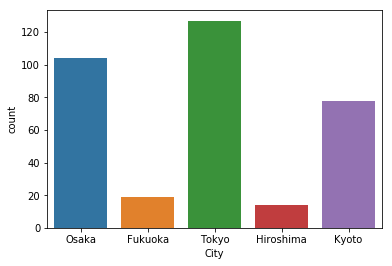

In [35]:
##number of hostels in each city
df.groupby('City').count()
df.head()
sns.countplot(x='City', data=finaldf)

In [44]:
#most highly rated hostels in all of Japan 
#where are the superb hostels

superb = pd.DataFrame(df.loc[df['rating'] == "Superb"])
superb.describe()

,start price,total score,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.00000,182.000000
mean,2608.241758,9.345055,8.985714,9.609341,9.280769,9.112088,9.450000,9.618681,9.36044,5.935714
std,811.987662,0.264581,0.576342,0.333855,0.456643,0.648898,0.389184,0.319500,0.41435,5.212807
min,1000.000000,9.000000,7.400000,8.400000,7.300000,6.000000,8.000000,8.500000,8.00000,0.400000
25%,2000.000000,9.100000,8.700000,9.325000,9.000000,8.800000,9.200000,9.400000,9.10000,2.225000
50%,2500.000000,9.300000,9.000000,9.600000,9.300000,9.200000,9.500000,9.700000,9.40000,4.350000
75%,2900.000000,9.500000,9.400000,9.900000,9.600000,9.500000,9.700000,9.900000,9.60000,8.600000
max,6500.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,36.600000


In [ ]:
#table of avg age of passenger by survival status, sex, and passenger class
#df.groupby(['City', 'sex', 'pclass'])['total score'].mean()

In [38]:
#top highly rated hostels 

top10 = pd.DataFrame(df.nlargest(10, 'total score'))
top10.mean()


start price        2510.00
total score           9.98
atmosphere           10.00
cleanliness          10.00
facilities           10.00
location              9.90
security             10.00
staff                10.00
value for money       9.90
distance              7.86
dtype: float64

In [ ]:
#start price by city
sns.barplot('City','start price', data=df)

City Population
- Tokyo: 8,336,599
- Osaka: 2,592,413
- Kyoto: 1,459,640
- Fukuoka: 1,392,289
- Hiroshima: 1,143,841

In [ ]:
# city population dataframe
city = ['Tokyo', 'Osaka', 'Kyoto', 'Fukuoka', 'Hiroshima']
pop = [8336599, 2592413, 1459640, 1392289, 1143841]
PopList = list(zip(city,pop))
popdf = pd.DataFrame(data=PopList, columns=['city', 'pop'])

#export dataset
popdf = pd.DataFrame(data = popdf)
df.to_csv('popdf.csv', index=False, header=True)

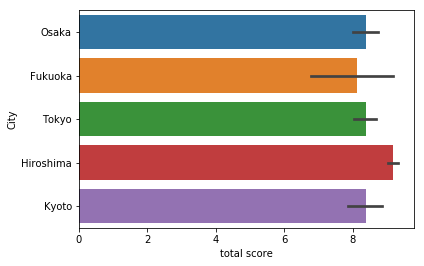

In [46]:
#avg total rating by city
sns.barplot('total score', 'City', data=df)

In [40]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr()

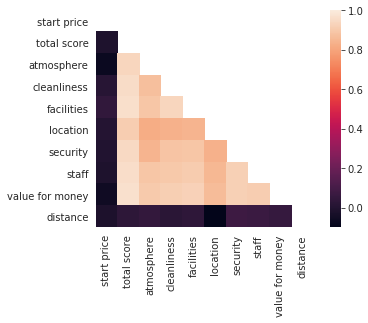

In [41]:
# Can be great to plot only a half matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, mask=mask, square=True)


In [42]:
df.corr()

,start price,total score,atmosphere,cleanliness,facilities,location,security,staff,value for money,distance
start price,1.000000,-0.011151,-0.067939,0.011990,0.043657,0.005095,-0.003723,-0.010034,-0.056098,-0.015879
total score,-0.011151,1.000000,0.936167,0.956284,0.962271,0.909910,0.947865,0.960356,0.968910,0.033193
atmosphere,-0.067939,0.936167,1.000000,0.872613,0.891008,0.822042,0.843015,0.888797,0.904792,0.049180
cleanliness,0.011990,0.956284,0.872613,1.000000,0.936835,0.835795,0.886727,0.899078,0.915403,0.020926
facilities,0.043657,0.962271,0.891008,0.936835,1.000000,0.841418,0.890835,0.905538,0.923816,0.034903
location,0.005095,0.909910,0.822042,0.835795,0.841418,1.000000,0.836062,0.852083,0.862706,-0.099721
security,-0.003723,0.947865,0.843015,0.886727,0.890835,0.836062,1.000000,0.921871,0.919467,0.078477
staff,-0.010034,0.960356,0.888797,0.899078,0.905538,0.852083,0.921871,1.000000,0.911059,0.071940
value for money,-0.056098,0.968910,0.904792,0.915403,0.923816,0.862706,0.919467,0.911059,1.000000,0.055779
distance,-0.015879,0.033193,0.049180,0.020926,0.034903,-0.099721,0.078477,0.071940,0.055779,1.000000
